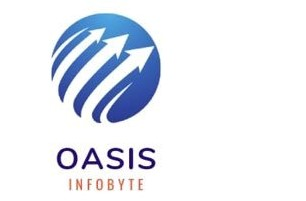

# _Oasis Infobyte Internship_

## _Task 5 - Email Spam detection using Machine Learning_

_Code Author - Manoj Kumar_

_Data Science virtual internship_

## _Import required modules_

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

## _Read the dataset_

In [3]:
data=pd.read_csv('E:\Mano@workspace\Datasets\spam.csv',encoding = "latin-1")

In [4]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

## _Data Transformation_

In [6]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
spam=data.rename(columns={"v1":"Label", "v2":"Text"})

In [8]:
spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [9]:
spam.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
spam.isnull().sum()

Label    0
Text     0
dtype: int64

## _Data Analyse_

In [11]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
spam.describe()

,Label,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## _Data Visualisation_

In [13]:
import seaborn as sns

<AxesSubplot: xlabel='Label', ylabel='count'>

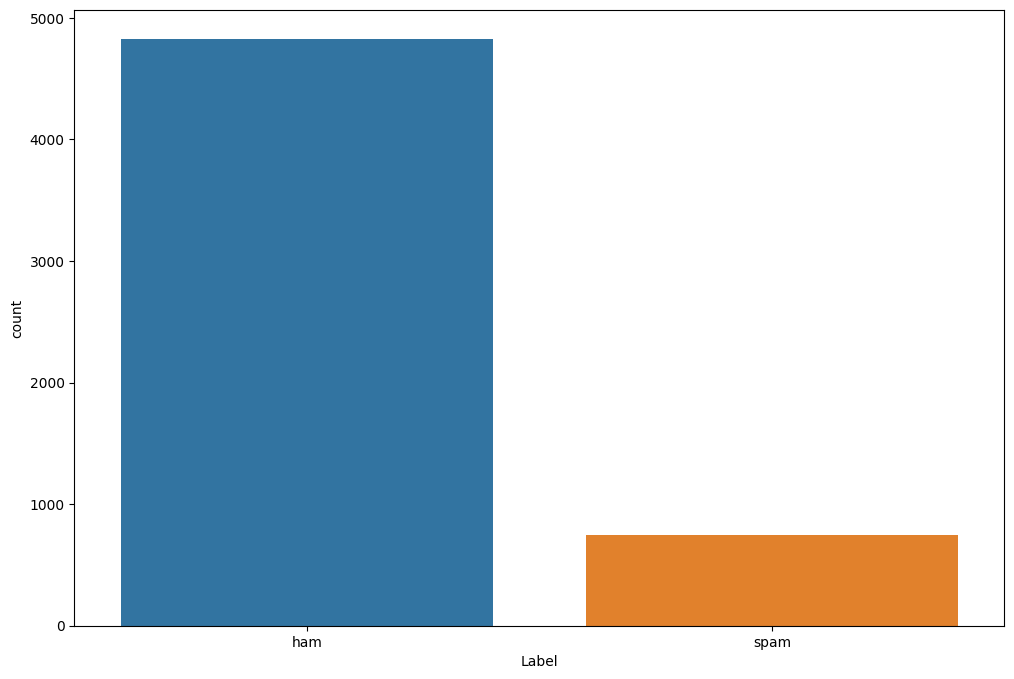

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(data=spam,x='Label')

## _Build  a model_

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
x = np.array(spam['Text'])
y =np.array(spam['Label'])
cv= CountVectorizer()
X =cv.fit_transform(x)

In [17]:
x

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [18]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [19]:
cv= CountVectorizer()
x=cv.fit_transform(x)

## _Train the model_

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
clf= MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

## _Test the Spam Detector Model_

In [25]:
test=input('Enter a massage:')
spam_test=cv.transform([test]).toarray()
result=clf.predict(spam_test)
print(result)
if result=='ham':
    print('Good Mail')
else:
    print('Spam Mail')

Enter a massage:Follow me Guys !!
['ham']
Good Mail


## _Summary_

_Here we learn to build and train a model to detect the mail is spam or good mail by using CountVectorizer and other machine learning tools_